<a href="https://colab.research.google.com/github/taeilkeemm/fordatastudy/blob/main/%EA%B3%B5%EA%B3%B5%EC%A1%B0%EB%8B%AC_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret

     |████████████████████████████████| 301 kB 4.9 MB/s 
     |████████████████████████████████| 86 kB 2.9 MB/s 
     |████████████████████████████████| 2.0 MB 41.7 MB/s 
     |████████████████████████████████| 114 kB 46.6 MB/s 
     |████████████████████████████████| 15.6 MB 34.7 MB/s 
     |████████████████████████████████| 167 kB 49.3 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 1.3 MB 23.6 MB/s 
     |████████████████████████████████| 261 kB 54.5 MB/s 
     |████████████████████████████████| 6.8 MB 37.7 MB/s 
     |████████████████████████████████| 1.7 MB 45.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 303 kB 55.1 MB/s 
     |████████████████████████████████| 10.9 MB 37.7 MB/s 
     |████████████████████████████████| 102 kB 10.9 MB/s 
     |████████████████

In [13]:
# read csv file
import pandas as pd
data = pd.read_csv('1등_쓰레기봉투.csv')
data['납품요구접수일자'] = pd.to_datetime(data['납품요구접수일자'])

In [14]:
import plotly.express as px
fig = px.line(data, x="납품요구접수일자", y=["증감납품요구수량"], template = 'plotly_dark')
fig.show()

In [15]:
# split data into train-test set
split_ratio = 0.8
split = int(len(data)*split_ratio)
train = data[:split]
test = data[split:]

In [16]:
from pycaret.regression import *
reg = setup(train, target = '증감납품요구수량', train_size=0.8)

,Description,Value
0,session_id,6799
1,Target,증감납품요구수량
2,Original Data,"(1032, 2)"
3,Missing Values,False
4,Numeric Features,0
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(825, 21)"


In [17]:
##모델비교
best = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,3.368468e+06,2.329043e+13,4.781871e+06,0.1273,1.3573,50.9294,0.025
llar,Lasso Least Angle Regression,3.372738e+06,2.331498e+13,4.784987e+06,0.1255,1.3596,51.5201,0.032
lasso,Lasso Regression,3.372749e+06,2.331509e+13,4.784999e+06,0.1255,1.3596,51.5210,0.036
lar,Least Angle Regression,3.372782e+06,2.331640e+13,4.785166e+06,0.1254,1.3596,51.5214,0.030
lr,Linear Regression,3.383187e+06,2.348932e+13,4.803998e+06,0.1159,1.3789,52.9193,0.504
lightgbm,Light Gradient Boosting Machine,3.415239e+06,2.399950e+13,4.852281e+06,0.1000,1.3896,51.9809,0.069
gbr,Gradient Boosting Regressor,3.405536e+06,2.406593e+13,4.859899e+06,0.0978,1.3879,59.8768,0.068
omp,Orthogonal Matching Pursuit,3.498825e+06,2.422602e+13,4.877261e+06,0.0922,1.4448,57.2244,0.026
rf,Random Forest Regressor,3.514550e+06,2.553778e+13,5.007336e+06,0.0341,1.3946,59.7281,0.467
et,Extra Trees Regressor,3.572032e+06,2.630755e+13,5.082147e+06,0.0033,1.4191,62.5964,0.450


In [20]:
ridge = create_model('ridge', cross_validation = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3381457.5,2.298656e+13,4794430.5,0.0959,1.2294,92.875198


In [21]:
##하이퍼파라미터 튜닝
tuned_ridge = tune_model(ridge, optimize = 'RMSE', n_iter = 10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.249018e+06,2.345000e+13,4.842520e+06,0.2915,1.1620,3.4260
1,3.067200e+06,2.739481e+13,5.234006e+06,0.0918,1.1504,2.6803
2,3.926796e+06,3.628439e+13,6.023652e+06,0.2026,1.1868,3.1697
3,3.429153e+06,2.878977e+13,5.365610e+06,0.2483,1.6543,63.4073
4,2.904134e+06,1.546007e+13,3.931930e+06,0.3116,1.4183,173.3342
5,3.090825e+06,1.657084e+13,4.070730e+06,0.1733,1.3495,41.3298
6,3.150301e+06,1.918927e+13,4.380556e+06,0.1980,0.9048,1.3220
7,3.780061e+06,2.601607e+13,5.100596e+06,-0.0499,1.6916,191.0452
8,3.111222e+06,1.385924e+13,3.722800e+06,-0.0445,1.9588,1.6956
9,3.551849e+06,2.540643e+13,5.040480e+06,-0.0548,1.0237,3.0386


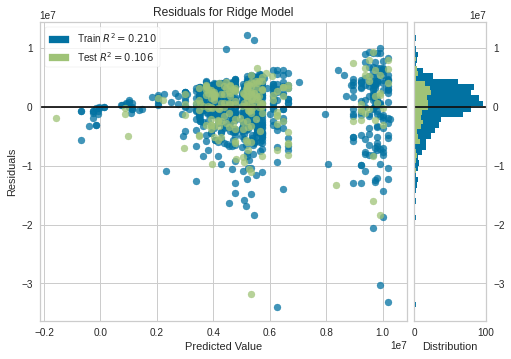

In [22]:
# 모델 시각화(plot)_plot = 'residuals'
plot_model(tuned_ridge)

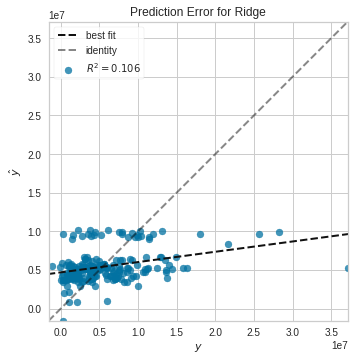

In [23]:
# 모델 시각화(plot)_plot = 'error'
plot_model(tuned_ridge, plot='error')

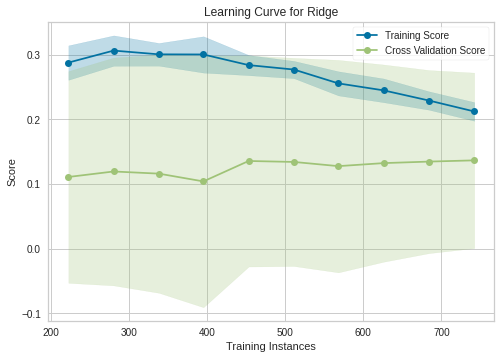

In [24]:
# 모델 시각화(plot)_plot = 'learning'

plot_model(tuned_ridge, plot='learning')

In [25]:
# 마지막 학습(Finalize)

final_model = finalize_model(tuned_ridge)


# 예측(Predict)

pred = predict_model(final_model, data = test)